# Diagnóstico de Câncer de Mama com Aprendizado de Máquina  

---

**Instituição:** FIAP – Faculdade de Informática e Administração Paulista  
**Curso:** Pós-Tech IA para Devs  
**Turma:** IADT7  
**Fase:** 1  
**Tema:** Classificação de Exames Médicos com Machine Learning  
**Autor:** Antonio Augusto Corrêa Gondim Neto  
**Data:** Outubro/2025

---

### 🎯 Objetivo do Projeto

Este notebook integra a entrega técnica da **Fase 1 do Tech Challenge**, cujo desafio consiste em **desenvolver um sistema inteligente de suporte ao diagnóstico médico**, 
utilizando **Machine Learning** para classificação automática de exames.

Neste caso, foi selecionado o dataset **Breast Cancer Wisconsin (Diagnostic)**, disponível no [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data), 
para criar um modelo preditivo capaz de **identificar se um tumor é benigno ou maligno** a partir de 30 características extraídas de exames histológicos.

---



## 🧩 Introdução

O câncer de mama é uma das principais causas de mortalidade entre mulheres em todo o mundo. 
O diagnóstico precoce é essencial para aumentar as chances de tratamento bem-sucedido.

Este notebook tem como objetivo **desenvolver um modelo de aprendizado de máquina capaz de prever se um tumor é maligno ou benigno**, 
com base em características extraídas de imagens digitalizadas de exames de mama (citologia aspirativa por agulha fina).

Utilizaremos o dataset **Breast Cancer Wisconsin (Diagnostic) Data Set**, disponível no Kaggle:
👉 [https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

As etapas principais incluem:
1. Exploração e pré-processamento dos dados;  
2. Treinamento de modelos de classificação;  
3. Avaliação de desempenho;  
4. Interpretação dos resultados e conclusões.


## 📚 Descrição do Dataset

O conjunto de dados contém **569 amostras** de tumores de mama, cada uma descrita por **30 características numéricas** 
extraídas de imagens digitalizadas de tecido mamário.

Essas características representam medidas estatísticas de propriedades como raio, textura, suavidade, concavidade, simetria, entre outras.

A coluna `diagnosis` é a variável _target_, representada pelos seguintes valores:
- **M** → Maligno  
- **B** → Benigno  

**Fonte:**  
- Autor: Dr. William H. Wolberg, University of Wisconsin  
- Base original: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

**Estrutura resumida:**
| Tipo de coluna | Descrição |
|----------------|------------|
| ID             | Identificador único da amostra |
| diagnosis      | Variável alvo (M ou B) |
| 30 features numéricas | Medidas estatísticas das células tumorais |

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando o dataset
dataset = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [3]:
# Visualizando informações gerais
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Mostrando as primeiras linhas
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 🔍 Análise Exploratória dos Dados (EDA)

Antes de desenvolver o modelo preditivo, é fundamental compreender a estrutura e o comportamento dos dados disponíveis.

A Análise Exploratória de Dados (EDA) permite identificar padrões, relações entre variáveis e potenciais problemas que possam impactar o desempenho do modelo.

Nesta etapa, serão realizadas as seguintes análises:
- Distribuição da variável alvo (diagnosis) para entender o balanceamento entre as classes maligno e benigno;
- Estatísticas descritivas das principais features, avaliando amplitude, dispersão e possíveis outliers;
- Correlação entre variáveis, para detectar redundâncias e dependências lineares;
- Visualizações exploratórias, que ajudam a revelar padrões e comportamentos não triviais nos dados.

### 🧱 Colunas Não Informativas

Durante a inspeção inicial com `df.info()`, foram identificadas duas colunas que não agregam valor à análise:

- **`id`** → identificador único da amostra, sem relação com o diagnóstico;  
- **`Unnamed: 32`** → coluna vazia (contém apenas valores nulos).  

Essas colunas serão **removidas antes da etapa de modelagem**, pois não possuem relevância estatística nem informacional 
para o aprendizado do modelo de classificação.

In [5]:
# Removendo colunas irrelevantes
cols_to_drop = ['id', 'Unnamed: 32']
dataset.drop(columns=[c for c in cols_to_drop if c in dataset.columns], inplace=True)

In [6]:
# Confirmando resultado
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### 🧱 Linhas Duplicadas

Após a remoção das colunas não informativas (**id** e **Unnamed: 32**), o próximo passo é verificar se existem linhas duplicadas no dataset.

Por que fazemos isso:
- Cada linha deve representar uma amostra única (um exame/paciente).
- Linhas duplicadas podem inflar artificialmente a frequência de certos padrões, fazendo o modelo “decorar” exemplos repetidos ao invés de aprender padrões gerais.
- Em contextos médicos, duplicatas são especialmente problemáticas: podem gerar viés e falsa precisão, comprometendo a validade estatística da predição.
- Identificar e remover duplicatas garante que o aprendizado ocorra sobre informações independentes e não redundantes.

In [7]:
dataset.duplicated().sum()

0


Durante a verificação com `df.duplicated().sum()`, **não foram encontradas linhas duplicadas no dataset**.

### 📊 Estatísticas Descritivas das Features

Nesta etapa, buscamos compreender as características estatísticas das variáveis numéricas do dataset.
Cada coluna representa uma propriedade física ou geométrica extraída das imagens das células mamárias — como raio médio, textura, suavidade, concavidade e simetria.

Ao calcular medidas como média, desvio padrão, mínimo e máximo, podemos identificar:

- Variáveis com escalas muito diferentes, que precisarão de padronização (por exemplo, StandardScaler);
- Outliers evidentes, com valores muito distantes da média;
- Amplitude e dispersão distintas entre as features, que podem afetar o comportamento de alguns algoritmos.

Essas observações nos ajudam a entender a estrutura e a variabilidade dos dados, preparando o terreno para o pré-processamento e a seleção de modelos adequados.


In [8]:
# Estatísticas descritivas das variáveis numéricas
desc = dataset.describe()
desc.T  # transposta para leitura mais fácil

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


A partir da análise das colunas `min` e `max` obtidas com `df.describe()`, observou-se uma **grande variação de escala** entre as _features_. Por exemplo, `area_mean` varia de **143,5 a 2501,0**, enquanto `smoothness_mean` oscila apenas entre **0,05 e 0,16**.

Essa diferença de magnitude, evidenciada pela amplitude (`max - min`), indica a necessidade de aplicar padronização no pré-processamento, para que variáveis com valores absolutos maiores não dominem o processo de aprendizado.

Além disso, colunas como `area_worst` e `perimeter_worst` apresentaram alta dispersão, identificada observando a coluna `std` (desvio padrão) no resultado de `df.describe()`, sugerindo que podem ser boas discriminadoras entre tumores malignos e benignos.

### 🧮 Balanceamento da Variável Target (`diagnosis`)

Nesta etapa, analisamos a distribuição da variável `diagnosis`, que indica se um tumor é maligno (M) ou benigno (B).

Compreender essa proporção é essencial para avaliar o equilíbrio entre as classes e antecipar possíveis desafios no aprendizado do modelo.

Quando uma das classes é muito mais frequente que a outra, o modelo tende a priorizar a classe dominante, reduzindo sua capacidade de reconhecer corretamente os casos menos comuns — justamente os mais críticos em diagnósticos médicos.

In [9]:
dataset["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

O conjunto de dados apresenta **357 casos benignos e 212 casos malignos**.

Isso significa que aproximadamente **63% das amostras são benignas e 37% são malignas** — uma diferença moderada, mas suficiente para que o modelo **tenda a favorecer a classe majoritária durante o aprendizado**.

Para problemas de classificação binária, o balanceamento é considerado aceitável quando a classe minoritária representa pelo menos 30–40% do total.

### ⚙️ Conversão da Variável Target (`diagnosis`) para Binário

Até aqui, a variável diagnosis — que indica se o tumor é maligno (M) ou benigno (B) — está armazenada como texto (object).
No entanto, para realizar análises quantitativas, como a correlação entre as features e o diagnóstico, é necessário que essa variável seja numérica.

Por isso, realizamos a conversão de:

- “M” → 1 (tumor maligno)
- “B” → 0 (tumor benigno)

Essa transformação permite que a variável diagnosis seja utilizada em cálculos estatísticos e, posteriormente, como target numérico nos modelos de aprendizado de máquina.

In [10]:
# Conversão da variável target para formato binário
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

### 🔗 Correlação das Features com a Variável Target (`diagnosis`)

O objetivo aqui é identificar quais variáveis têm maior influência sobre o diagnóstico.

Ao calcular a correlação de cada feature numérica com a variável `diagnosis`, podemos ter uma noção inicial de quais atributos têm maior poder explicativo.

In [11]:
# Calcular correlação das features numéricas com o target
corr_target = dataset.corr(numeric_only=True)['diagnosis'].sort_values(ascending=False)

In [12]:
# Exibir top 10 correlações positivas e negativas
corr_target.head(10), corr_target.tail(10)

(diagnosis               1.000000
 concave points_worst    0.793566
 perimeter_worst         0.782914
 concave points_mean     0.776614
 radius_worst            0.776454
 perimeter_mean          0.742636
 area_worst              0.733825
 radius_mean             0.730029
 area_mean               0.708984
 concavity_mean          0.696360
 Name: diagnosis, dtype: float64,
 smoothness_mean            0.358560
 symmetry_mean              0.330499
 fractal_dimension_worst    0.323872
 compactness_se             0.292999
 concavity_se               0.253730
 fractal_dimension_se       0.077972
 symmetry_se               -0.006522
 texture_se                -0.008303
 fractal_dimension_mean    -0.012838
 smoothness_se             -0.067016
 Name: diagnosis, dtype: float64)

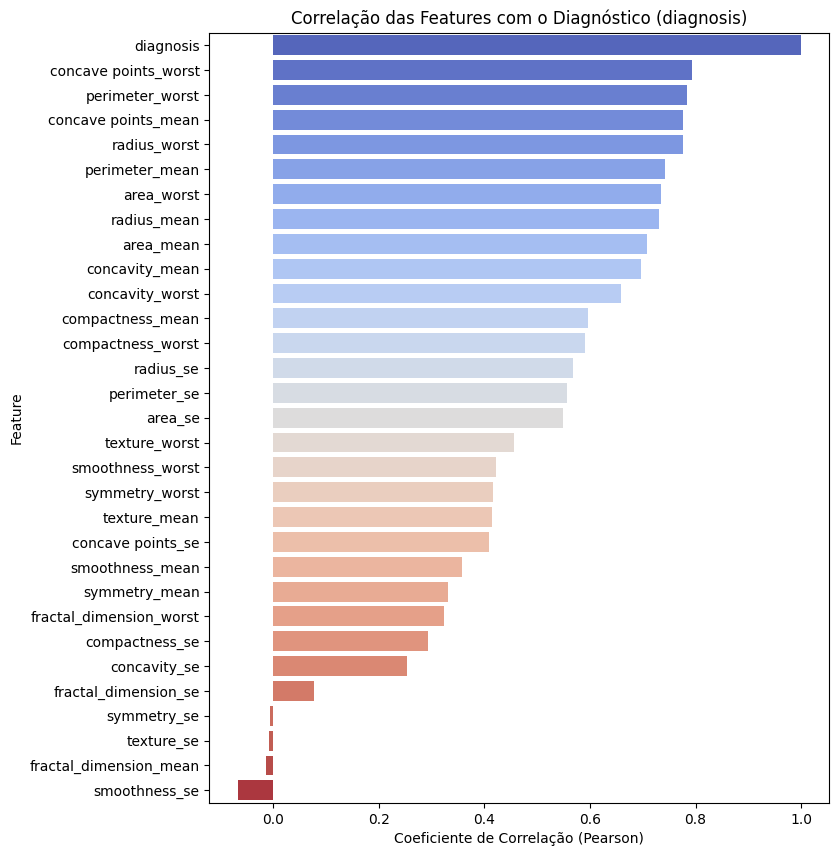

In [13]:
# Visualização das correlações com o target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 10))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")
plt.title("Correlação das Features com o Diagnóstico (diagnosis)")
plt.xlabel("Coeficiente de Correlação (Pearson)")
plt.ylabel("Feature")
plt.show()

As _features_ com *maior correlação positiva* com a variável `diagnosis` — ou seja, mais associadas a tumores malignos — foram:

| Feature | Correlação | Interpretação |
|----------|-------------|----------------|
| `concave points_worst` | **0.79** | A forma e a concavidade das bordas do tumor têm forte relação com malignidade. |
| `perimeter_worst` | **0.78** | Tumores com perímetro maior tendem a ser malignos. |
| `radius_worst` | **0.78** | O tamanho máximo do tumor está diretamente ligado ao diagnóstico maligno. |
| `area_worst` | **0.73** | Tumores maiores apresentam maior probabilidade de serem malignos. |
| `concavity_mean` | **0.70** | Irregularidades nas células são marcadores fortes de malignidade. |

Essas variáveis estão fortemente correlacionadas entre si e representam **aspectos geométricos** do tumor — tamanho, área e formato — que são fatores clínicos críticos para distinguir tumores malignos de benignos.

### 🎯 Visualização da Separação entre as Classes

Antes de escolher o modelo de aprendizado, é fundamental observar como as amostras se distribuem no espaço das principais variáveis.

Essa análise visual mostra se as classes (`diagnosis = 0` benigno, `1` maligno) se separam de forma linear ou complexa, o que orienta a escolha dos algoritmos.

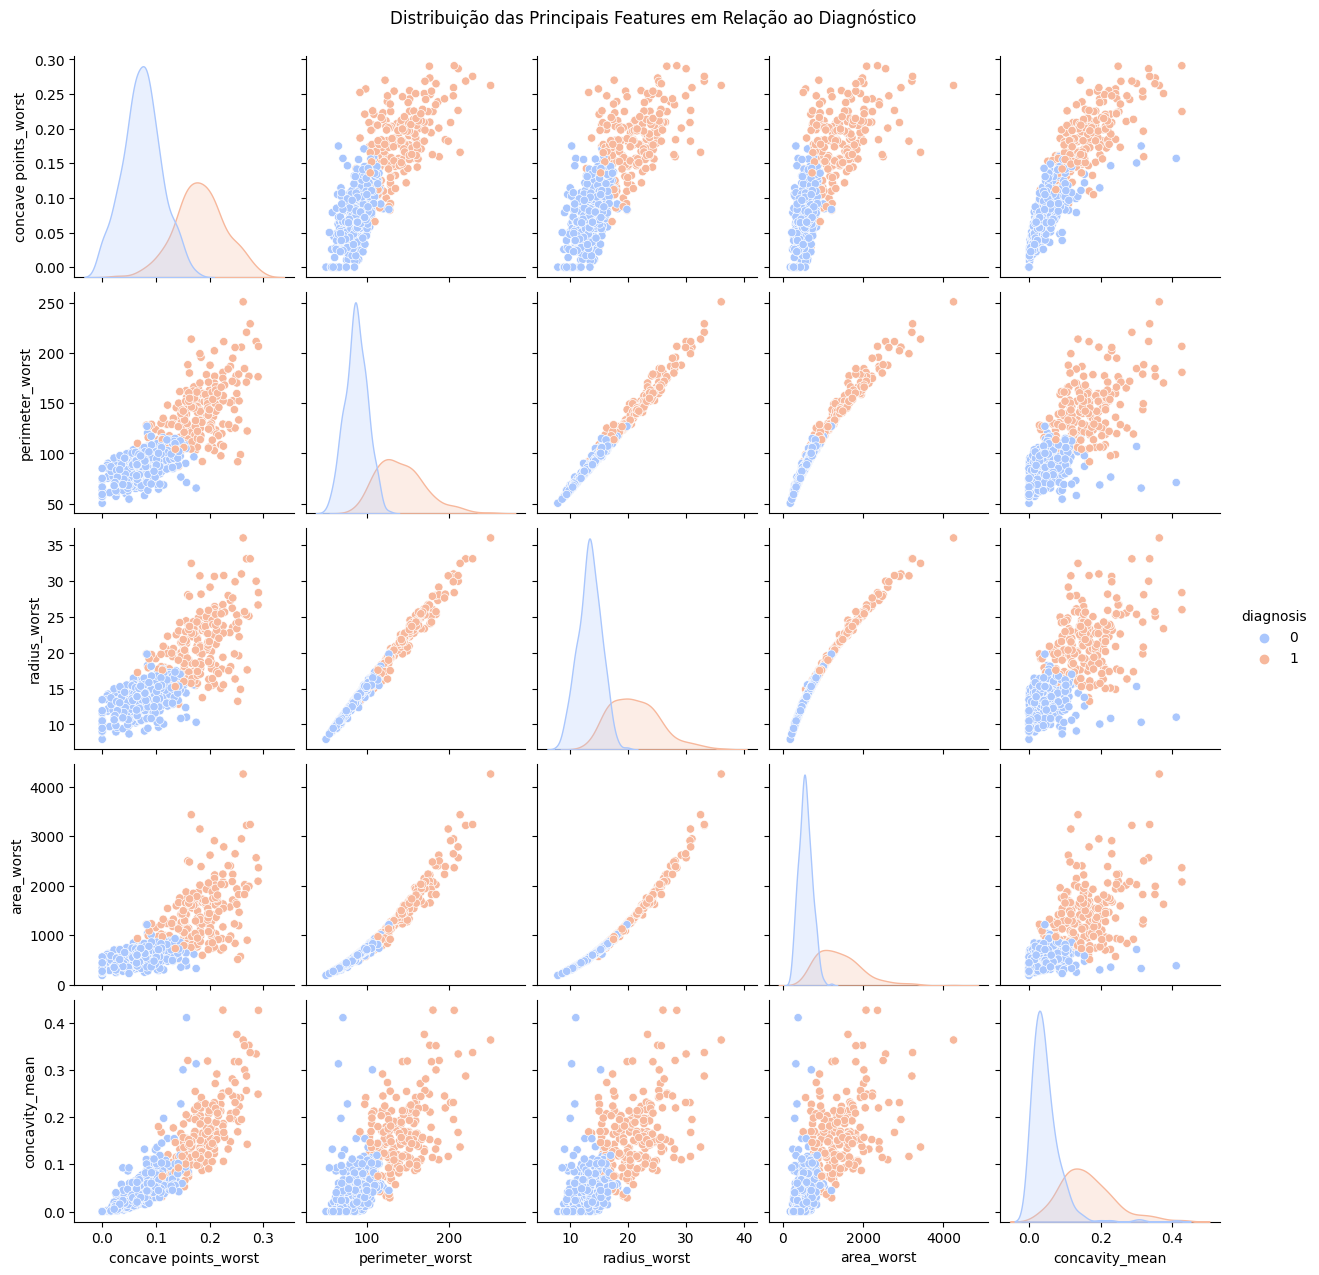

In [14]:
# Selecionar as variáveis mais correlacionadas com o diagnóstico
top_features = [
    'concave points_worst',
    'perimeter_worst',
    'radius_worst',
    'area_worst',
    'concavity_mean',
    'diagnosis'
]

sns.pairplot(dataset[top_features], hue='diagnosis', palette='coolwarm', diag_kind='kde')
plt.suptitle("Distribuição das Principais Features em Relação ao Diagnóstico", y=1.02)
plt.show()

### 🎨 Análise Visual da Separação das Classes

O *pairplot* das principais variáveis mais correlacionadas com o diagnóstico — `concave points_worst`, `perimeter_worst`, `radius_worst`, `area_worst` e `concavity_mean` — mostra uma **separação clara entre tumores benignos e malignos**.

Nos gráficos diagonais, é possível ver que as amostras **malignas (vermelhas)** concentram-se em **valores mais altos** dessas variáveis, enquanto as **benignas (azuis)** se mantêm nas faixas inferiores.  
Isso indica que **tumores malignos tendem a ser maiores e mais irregulares**, o que faz sentido clinicamente e reforça os resultados da correlação numérica.

Nas relações entre as features, observamos **padrões quase lineares**, o que mostra que essas variáveis estão fortemente relacionadas entre si (ex.: quanto maior o raio, maior a área e o perímetro).  
Apesar disso, ainda existe **alguma sobreposição entre as classes**, principalmente nas faixas intermediárias, sugerindo que **a separação não é perfeitamente linear**.

➡️ **Conclusão:**  
- As classes apresentam **boa separabilidade**, mas não perfeita.  
- Modelos **lineares** (como Regressão Logística) podem capturar boa parte do padrão,  
  porém **modelos não lineares** (como Random Forest ou XGBoost) podem oferecer desempenho superior ao lidar com as zonas de sobreposição.

## 🧠 Construção e Avaliação do Modelo Preditivo

Após a análise exploratória e o pré-processamento, estamos prontos para construir modelos de aprendizado supervisionado capazes de prever se um tumor é maligno (1) ou benigno (0).

Nesta etapa, iremos:

- Dividir o conjunto de dados em treino e teste;
- Treinar diferentes modelos base (baseline);
- Avaliar o desempenho usando métricas apropriadas para dados médicos (Recall, Precision, F1 e ROC-AUC);
- Escolher o modelo mais promissor para ajuste fino (tuning).

### ✂️ Separação dos Dados

Antes do treinamento, dividimos o conjunto em **dados de treino (80%)** e **teste (20%)** para avaliar o desempenho do modelo em informações não vistas.

In [15]:
from sklearn.model_selection import train_test_split

# Separar variáveis independentes (X) e dependente (y)
X = dataset.drop(columns='diagnosis')
y = dataset['diagnosis']

# Divisão em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### ⚖️ Normalização dos Dados

Durante a análise estatística, **observamos grande variação de escala** entre as variáveis — por exemplo, `area_mean` alcançando valores acima de 2000, enquanto `smoothness_mean` permanece próxima de 0.1.

Essa diferença pode distorcer o aprendizado de modelos que dependem de distâncias ou gradientes. Por isso, aplicamos **padronização (StandardScaler)** para igualar a contribuição de todas as features no processo de modelagem.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 🤖 Modelos Base (Baseline)

Após a normalização dos dados e a análise de separabilidade das classes, foram escolhidos três modelos de classificação supervisionada para estabelecer uma linha de base (baseline) de desempenho.


Esses modelos representam três abordagens distintas de aprendizado — linear, não linear contínua e baseada em árvores — permitindo avaliar qual delas melhor captura os padrões presentes no conjunto de dados.

In [17]:
from sklearn.metrics import classification_report, roc_auc_score

#### 📈 Regressão Logística

A **Regressão Logística** foi escolhida como o modelo linear base (*baseline*) por sua simplicidade e interpretabilidade. 

Ela permite verificar se a separação observada entre as classes é **aproximadamente linear** e serve como ponto de partida para comparação com modelos mais complexos.

In [18]:
from sklearn.linear_model import LogisticRegression

# Treinamento
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predições
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC: 0.9960


#### 🌀 SVM (Support Vector Machine) com Kernel RBF

O **SVM com kernel RBF** foi escolhido para capturar **fronteiras de decisão não lineares**, observadas pela leve sobreposição entre as classes.  

Esse modelo busca maximizar a separação entre os grupos (maligno e benigno) usando uma transformação em um espaço de maior dimensão.

In [19]:
from sklearn.svm import SVC

# Treinamento
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predições
y_pred_svm = svm_rbf.predict(X_test_scaled)
y_prob_svm = svm_rbf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print(classification_report(y_test, y_pred_svm))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_svm):.4f}")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC: 0.9947


#### 🌲 Random Forest

O **Random Forest** foi escolhido como modelo não linear baseado em árvores.

Ele é **robusto à multicolinearidade** observada entre as *features* geométricas e não depende de normalização.

Além disso, fornece **importâncias de variáveis**, úteis para identificar quais *features* mais influenciam o diagnóstico.

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Treinamento
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predições
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Avaliação
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC: 0.9929


### 🧩 Comparação Numérica (Métricas Consolidadas)

Após executar cada modelo, você pode calcular as principais métricas e consolidar em uma tabela:

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Dicionário de resultados
resultados = {
    'Modelo': ['Logistic Regression', 'SVM (RBF)', 'Random Forest'],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_rf)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_svm),
        roc_auc_score(y_test, y_prob_rf)
    ]
}

df_resultados = pd.DataFrame(resultados).set_index('Modelo')
display(df_resultados.sort_values(by='Recall', ascending=False))


,Recall,Precision,F1-Score,ROC-AUC
Modelo,,,,
Logistic Regression,0.928571,0.975,0.951220,0.996032
SVM (RBF),0.928571,1.000,0.962963,0.994709
Random Forest,0.928571,1.000,0.962963,0.992890


## ✅ Conclusão Comparativa dos Modelos

Os três modelos apresentaram **desempenho praticamente idêntico**, com **ROC-AUC ≈ 0.99** e **Recall ≈ 0.93**, mostrando que o conjunto de dados é **altamente separável**.

| Modelo | Desempenho | Interpretação |
|:--|:--|:--|
| **Regressão Logística** | Recall 0.93 / AUC 0.996 | Simples, interpretável e eficiente — ótima linha de base. |
| **SVM (RBF)** | Recall 0.93 / AUC 0.995 | Captura fronteiras não lineares, mas sem ganho real. |
| **Random Forest** | Recall 0.93 / AUC 0.993 | Forte em interações complexas, porém redundante aqui. |

➡️ **Conclusão:**  
Como todos os modelos performaram de forma semelhante, o **modelo ideal é a Regressão Logística**, por ser **mais simples, interpretável e clinicamente explicável**, sem perda de desempenho.